In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [3]:
#Load and Explore Dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Convert to DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
#Normalize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [9]:
from sklearn.model_selection import cross_val_score
for k in range(1, 16):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=5)  # 5-fold CV
    print(f"K = {k} | CV Accuracy = {scores.mean():.2f}")

K = 1 | CV Accuracy = 0.95
K = 2 | CV Accuracy = 0.95
K = 3 | CV Accuracy = 0.95
K = 4 | CV Accuracy = 0.95
K = 5 | CV Accuracy = 0.96
K = 6 | CV Accuracy = 0.97
K = 7 | CV Accuracy = 0.95
K = 8 | CV Accuracy = 0.97
K = 9 | CV Accuracy = 0.96
K = 10 | CV Accuracy = 0.96
K = 11 | CV Accuracy = 0.95
K = 12 | CV Accuracy = 0.95
K = 13 | CV Accuracy = 0.95
K = 14 | CV Accuracy = 0.94
K = 15 | CV Accuracy = 0.95


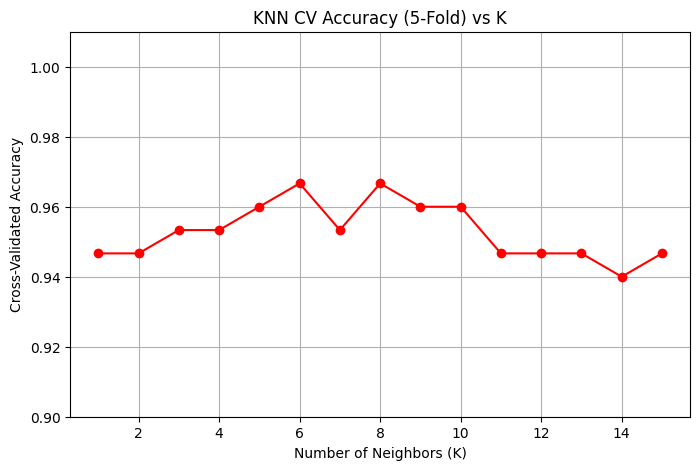

In [17]:
from sklearn.model_selection import cross_val_score
cv_accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=5)
    cv_accuracies.append(scores.mean())
plt.figure(figsize=(8, 5))
plt.plot(k_values, cv_accuracies, marker='o', color='red')
plt.title("KNN CV Accuracy (5-Fold) vs K")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Cross-Validated Accuracy")
plt.ylim(0.9, 1.01)
plt.grid(True)
plt.show()

Best K (Cross-Validated) = 6 | Accuracy = 0.97


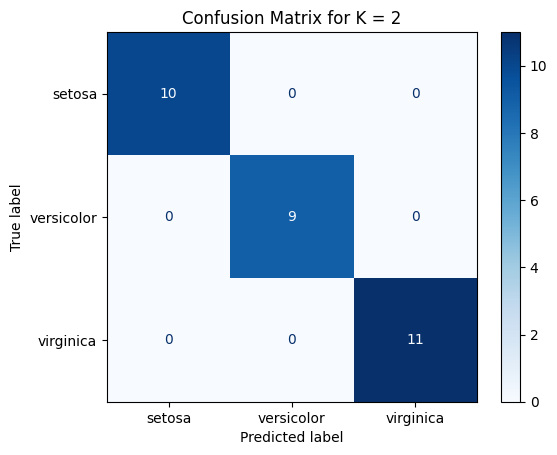

In [23]:
#Best K and Confusion Matrix
from sklearn.model_selection import cross_val_score
cv_scores = []
for k in range(1, 16):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=5)
    cv_scores.append(scores.mean())
best_cv_k = k_values[np.argmax(cv_scores)]
print(f"Best K (Cross-Validated) = {best_cv_k} | Accuracy = {max(cv_scores):.2f}")

# Train KNN with best K
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

# Predict on test set
y_pred_best = best_knn.predict(X_test)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

# Display it nicely
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='Blues')
plt.title(f"Confusion Matrix for K = {best_k}")
plt.grid(False)
plt.show()



Best K (Cross-Validated) = 6 | Accuracy = 0.97


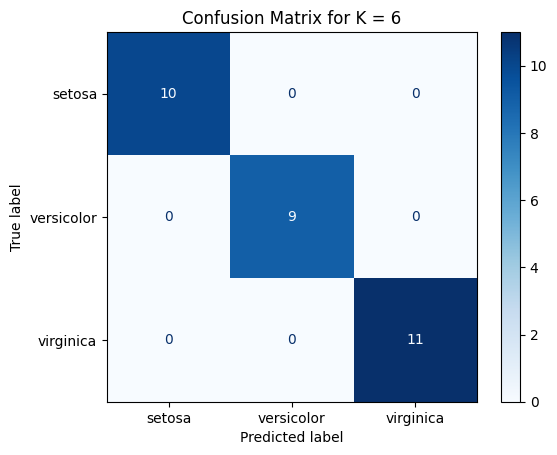

In [26]:
# Train KNN with cross-validated best K
best_knn = KNeighborsClassifier(n_neighbors=best_cv_k)
best_knn.fit(X_train, y_train)

# Predict on test set
y_pred_best = best_knn.predict(X_test)
print(f"Best K (Cross-Validated) = {best_cv_k} | Accuracy = {max(cv_scores):.2f}")

# Generate and display confusion matrix
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='Blues')
plt.title(f"Confusion Matrix for K = {best_cv_k}")
plt.grid(False)
plt.show()


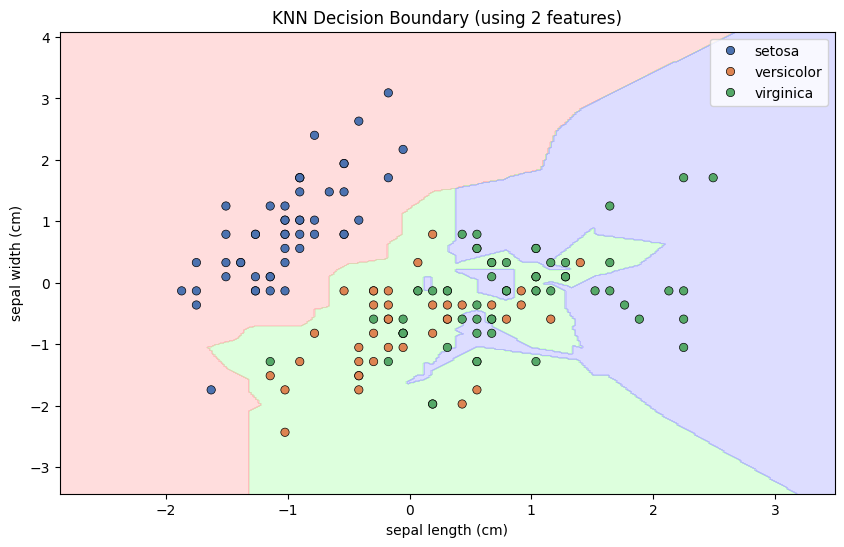

In [27]:
#Visualize Decision Boundary (Optional: Use 2 Features)
from matplotlib.colors import ListedColormap

# Use only first 2 features for 2D visualization
X_vis = X_scaled[:, :2]
X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(X_vis, y, test_size=0.2, random_state=42)

model_vis = KNeighborsClassifier(n_neighbors=best_k)
model_vis.fit(X_train_v, y_train_v)

# Create meshgrid
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = model_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.4)
sns.scatterplot(x=X_vis[:, 0], y=X_vis[:, 1], hue=iris.target_names[y],
                palette='deep', edgecolor='k')
plt.title("KNN Decision Boundary (using 2 features)")
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.show()


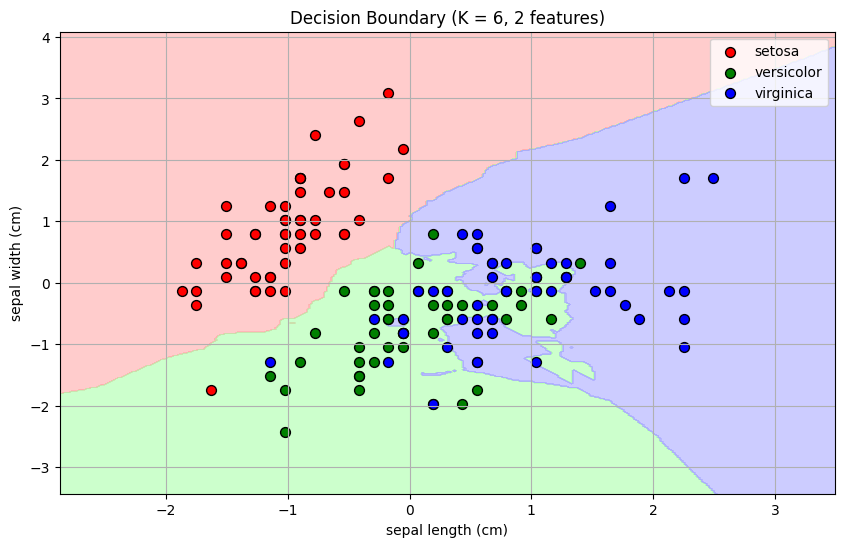

In [28]:
#Decision Boundary Visualization (using K = 6)
from matplotlib.colors import ListedColormap

# Use only the first 2 features for visualization
X_vis = X[:, :2]
y_vis = y

# Normalize just these 2 features
scaler_vis = StandardScaler()
X_vis_scaled = scaler_vis.fit_transform(X_vis)

# Split into train and test
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(
    X_vis_scaled, y_vis, test_size=0.2, random_state=42
)

# Train KNN with best_cv_k (K = 6)
knn_vis = KNeighborsClassifier(n_neighbors=best_cv_k)
knn_vis.fit(X_train_vis, y_train_vis)

# Create mesh grid for plotting
x_min, x_max = X_vis_scaled[:, 0].min() - 1, X_vis_scaled[:, 0].max() + 1
y_min, y_max = X_vis_scaled[:, 1].min() - 1, X_vis_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.02),
    np.arange(y_min, y_max, 0.02)
)

# Predict on the grid
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Define colors
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ['red', 'green', 'blue']

# Plot decision boundary and training points
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)

# Scatter the actual points
for i, color in zip(range(3), cmap_bold):
    idx = np.where(y_vis == i)
    plt.scatter(
        X_vis_scaled[idx, 0], X_vis_scaled[idx, 1],
        c=color, label=iris.target_names[i],
        edgecolor='k', s=50
    )

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title(f"Decision Boundary (K = {best_cv_k}, 2 features)")
plt.legend()
plt.grid(True)
plt.show()
